
--- SIFT FEATURE MATCHING PIPELINE ---
Query Image : 1.jpg
Train Image : 2.jpg

Detecting features...
Image 1 Keypoints: 1381
Image 2 Keypoints: 1146
Strong Matches after Ratio Test: 66


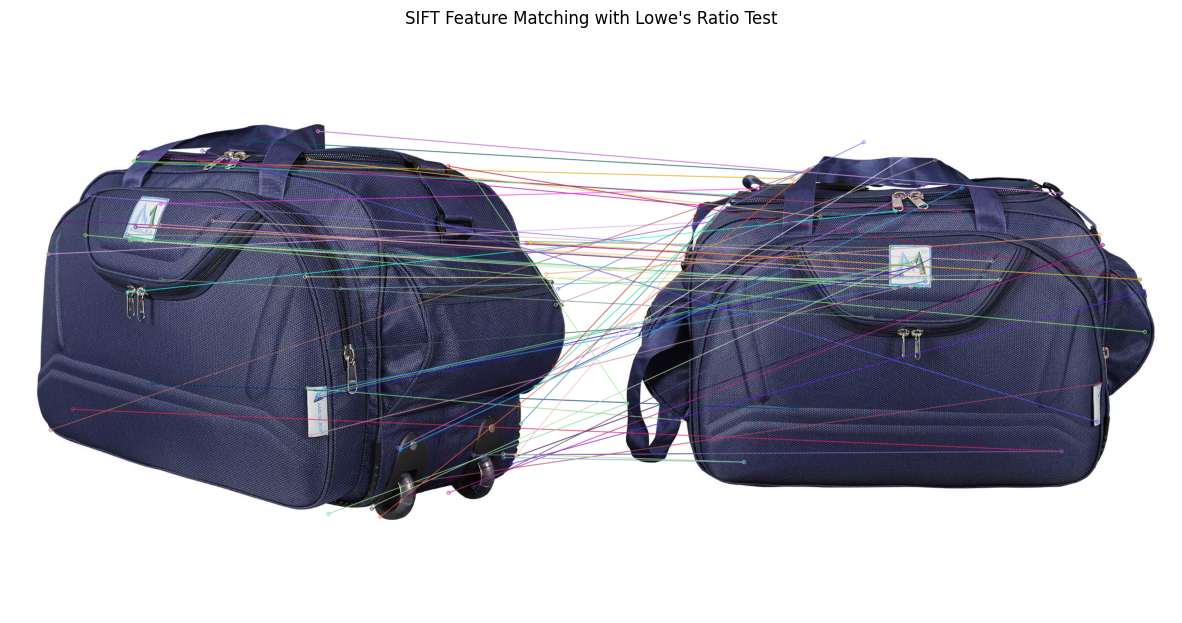

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# SIFT FEATURE MATCHING USING OPENCV
# Description:
# This script demonstrates how to detect and match visual features between
# two images using the SIFT (Scale-Invariant Feature Transform) algorithm.
# The matches are filtered using Lowe's Ratio Test for higher accuracy.
# =============================================================================


# -----------------------------------------------------------------------------
# 1. IMAGE LOADING & PREPROCESSING
# -----------------------------------------------------------------------------
def load_and_prepare_image(image_path):
    """
    Loads an image from disk and prepares it for processing.

    Returns:
        img_rgb  : RGB image for visualization (Matplotlib format)
        img_gray : Grayscale image for feature detection (OpenCV requirement)
    """
    img_bgr = cv2.imread(image_path)

    # Safety check
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {image_path}")

    # Convert for correct visualization and processing
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    return img_rgb, img_gray


# -----------------------------------------------------------------------------
# 2. FEATURE DETECTION USING SIFT
# -----------------------------------------------------------------------------
def detect_and_compute_sift(gray_img):
    """
    Detects keypoints and computes descriptors using SIFT.

    Keypoints  : Important locations in the image (corners, edges, blobs)
    Descriptors: 128-dimensional vectors describing each keypoint
    """
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)
    return keypoints, descriptors


# -----------------------------------------------------------------------------
# 3. FEATURE MATCHING PIPELINE
# -----------------------------------------------------------------------------
def match_images_and_visualize(img1_path, img2_path):
    print("\n--- SIFT FEATURE MATCHING PIPELINE ---")
    print(f"Query Image : {img1_path}")
    print(f"Train Image : {img2_path}")

    # Step 1: Load images
    img1_rgb, img1_gray = load_and_prepare_image(img1_path)
    img2_rgb, img2_gray = load_and_prepare_image(img2_path)

    # Step 2: Detect features
    print("\nDetecting features...")
    kp1, des1 = detect_and_compute_sift(img1_gray)
    kp2, des2 = detect_and_compute_sift(img2_gray)

    print(f"Image 1 Keypoints: {len(kp1)}")
    print(f"Image 2 Keypoints: {len(kp2)}")

    # Step 3: Initialize Brute-Force Matcher
    # NORM_L2 is used for SIFT (floating-point descriptors)
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

    # Step 4: k-Nearest Neighbors matching (k=2)
    raw_matches = bf.knnMatch(des1, des2, k=2)

    # Step 5: Lowe's Ratio Test
    good_matches = []
    for m, n in raw_matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    print(f"Strong Matches after Ratio Test: {len(good_matches)}")

    # Step 6: Draw matches
    matched_img = cv2.drawMatches(
        img1_rgb, kp1,
        img2_rgb, kp2,
        good_matches,
        None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # Step 7: Visualization
    plt.figure(figsize=(15, 10))
    plt.imshow(matched_img)
    plt.title("SIFT Feature Matching with Lowe's Ratio Test")
    plt.axis("off")
    plt.show()


# -----------------------------------------------------------------------------
# 4. MAIN EXECUTION
# -----------------------------------------------------------------------------
if __name__ == "__main__":
    query_image = "1.jpg"
    train_image = "2.jpg"

    match_images_and_visualize(query_image, train_image)